In [101]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [97]:
dvfs_list = ['1', '0c00', '0d00', '0e00', 
             '0f00', '1000', '1100', '1200', 
             '1300', '1400', '1500', '1600', '1700', '1800', '1900', '1a00']
dvfs_dict = {
    "0x0c00" :  1.2,
    "0x0d00" :  1.3,
    "0x0e00" :  1.4,
    "0x0f00" :  1.5,
    "0x1000" : 1.6,
    "0x1100" : 1.7,
    "0x1200" : 1.8,
    "0x1300" : 1.9,
    "0x1400" : 2.0,
    "0x1500" : 2.1,
    "0x1600" : 2.2,
    "0x1700" : 2.3,
    "0x1800" : 2.4,
    "0x1900" : 2.5,
    "0x1a00" : 2.6,
    "0x1b00" : 2.7,
    "0x1c00" : 2.8,
    "0x1d00" : 2.9,
}

df_dict = {
    'itr': [],
    'dvfs': [],
    'rate': [],
    'watts_avg': [],
    'watts_std': []
}

for itr in [1]:
    for dvfs in [1]:
        file=f"/home/han/github/logs/cores16_frate200000_600000_fbuff-1_itr{itr}_dvfs{dvfs}_rapl1_repeat0/summary.csv"
        df = pd.read_csv(file)
        
        dff = df[df['name'].str.contains('Sink')]
        dff.columns = 'Sink' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col] = []

        dff = df[df['name'].str.contains('Source')]
        dff.columns = 'Source' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col] = []

        dff = df[df['name'].str.contains('Mapper')]
        dff.columns = 'Mapper' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col] = []
print(df_dict.keys())

dict_keys(['itr', 'dvfs', 'rate', 'watts_avg', 'watts_std', 'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std', 'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std', 'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std', 'SinkbackPressuredTimeMsPerSecond_avg', 'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%', 'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg', 'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg', 'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg', 'SourcebusyTimeMsPerSecond_std', 'SourcebackPressuredTimeMsPerSecond_avg', 'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%', 'SourcebackPressuredTime_%', 'MappernumRecordsInPerSecond_avg', 'MappernumRecordsInPerSecond_std', 'MappernumRecordsOutPerSecond_avg', 'MappernumRecordsOutPerSecond_std', 'MapperbusyTimeMsPerSecond_avg', 'MapperbusyTimeMsPerSecond_std', 'MapperbackPressuredTimeMsPerSecond_avg', 'MapperbackPressuredTimeMsPe

In [98]:
for itr in [1]:
    for dvfs in dvfs_list:
        file=f"/home/han/github/logs/cores16_frate200000_600000_fbuff-1_itr{itr}_dvfs{dvfs}_rapl1_repeat0/summary.csv"

        df_dict['itr'].append(itr)
        if '0x'+dvfs in dvfs_dict:
            df_dict['dvfs'].append(dvfs_dict['0x'+dvfs])
        else:
            df_dict['dvfs'].append(dvfs)
            
        df_dict['rate'].append(200000)
        
        df = pd.read_csv(file)
        
        dff = df[df['name'].str.contains('Sink')]
        dff.columns = 'Sink' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col].append(dff.mean(numeric_only=True)[col])

        dff = df[df['name'].str.contains('Source')]
        dff.columns = 'Source' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col].append(dff.mean(numeric_only=True)[col])

        dff = df[df['name'].str.contains('Mapper')]
        dff.columns = 'Mapper' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col].append(dff.mean(numeric_only=True)[col])
            
        jfile = f"/home/han/github/logs/cores16_frate200000_600000_fbuff-1_itr{itr}_dvfs{dvfs}_rapl1_repeat0/server2_rapl.log"
        with open(jfile) as file:
            lines = [float(line.rstrip()) for line in file]
            print(len(lines))
            df_dict['watts_avg'].append(float(round(np.mean(lines[300:500]), 2)))
            df_dict['watts_std'].append(float(round(np.std(lines[300:500]), 2)))
            #print(np.std(lines[300:500]))
print(df_dict)
 

697
683
684
686
688
684
684
684
683
684
681
685
684
681
683
683
{'itr': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'dvfs': ['1', 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6], 'rate': [200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000], 'watts_avg': [79.57, 61.91, 63.27, 62.83, 64.3, 63.78, 63.41, 64.42, 66.02, 70.04, 68.3, 71.12, 73.59, 75.73, 73.2, 73.14], 'watts_std': [2.17, 0.34, 0.68, 0.88, 0.79, 0.86, 0.85, 1.01, 0.94, 1.21, 1.0, 1.18, 1.15, 1.1, 1.23, 1.39], 'SinknumRecordsInPerSecond_avg': [1399998.7136111108, 1399971.7474999998, 1399930.1283333334, 1399909.3422222226, 1399914.3080555554, 1399948.0991666666, 1399835.4438888887, 1399946.3372222222, 1399745.9469444442, 1399944.1916666662, 1399529.9627777773, 1399997.964444444, 1399989.3374999994, 1400013.7441666666, 1400000.0869444446, 1400000.0], 'SinknumRecordsInPerSecond_std': [27.35426566731823, 251.4993549654908, 

In [180]:
d = pd.DataFrame(df_dict)
d = d.astype(np.float32)
d.to_csv('query1.csv')
print(d.columns)

Index(['itr', 'dvfs', 'rate', 'watts_avg', 'watts_std',
       'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std',
       'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std',
       'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std',
       'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime_%', 'MappernumRecordsInPerSecond_avg',
       'MappernumRecordsInPerSecond_std', 'MappernumRecordsOutPerSecond_avg',
       'MappernumRecordsOutPerSecond_std', 'MapperbusyTimeMsPerSecond_avg',
       'M

In [177]:
def doPlot1(x, y, xlab, ylab, etitle="", blim=False):
    err = y.replace('avg', 'std')
    
    plt.errorbar(d[x].mean(), d[y][0], yerr=d[err][0], fmt="x", c='b', label="Dynamic")
    plt.errorbar(d[x][1:], d[y][1:], yerr=d[err][1:], fmt="o", c='g', label="Static")
    plt.ylabel(ylab, fontsize=16)
    plt.xlabel(xlab, fontsize=16)
    plt.legend()
    #plt.legend(loc='lower right')
    if blim:
        plt.ylim(bottom=0)
    if etitle:
        plt.title(f"Flink - Query1 - 16 Mappers - 200K rate - {etitle}")
    plt.tight_layout()

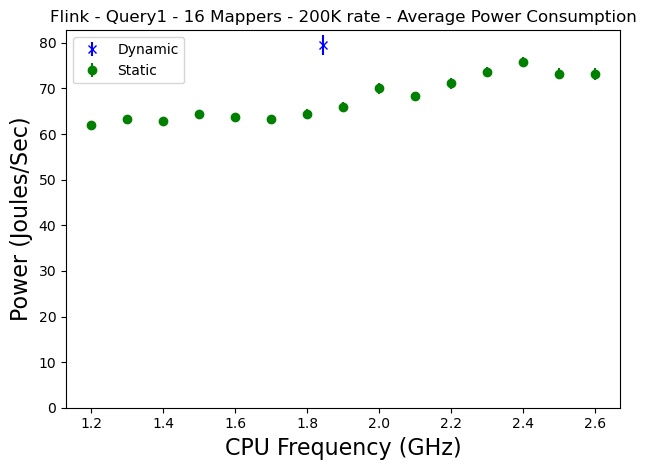

In [181]:
doPlot1('dvfs', 'watts_avg', "CPU Frequency (GHz)", 
        "Power (Joules/Sec)", etitle="Average Power Consumption",
       blim=True)

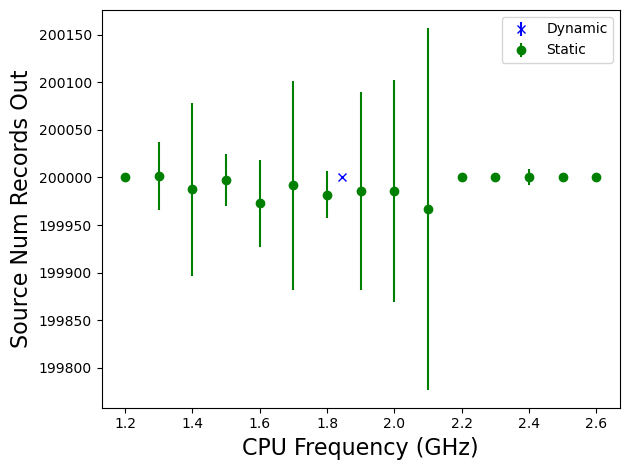

In [182]:
doPlot1('dvfs', 'SourcenumRecordsOutPerSecond_avg', 
        "CPU Frequency (GHz)", "Source Num Records Out")

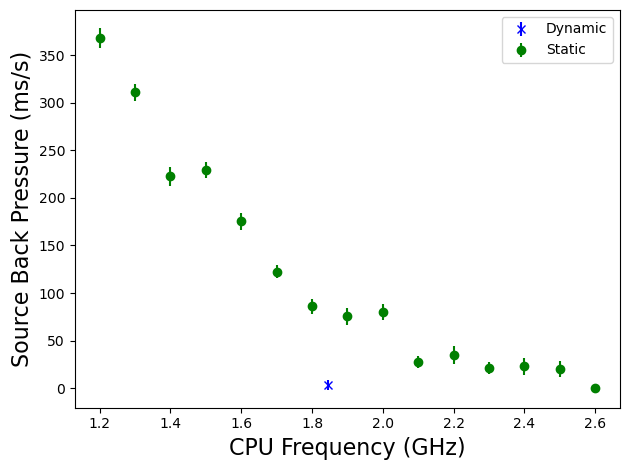

In [183]:
doPlot1('dvfs', 'SourcebackPressuredTimeMsPerSecond_avg', 
        "CPU Frequency (GHz)", "Source Back Pressure (ms/s)")

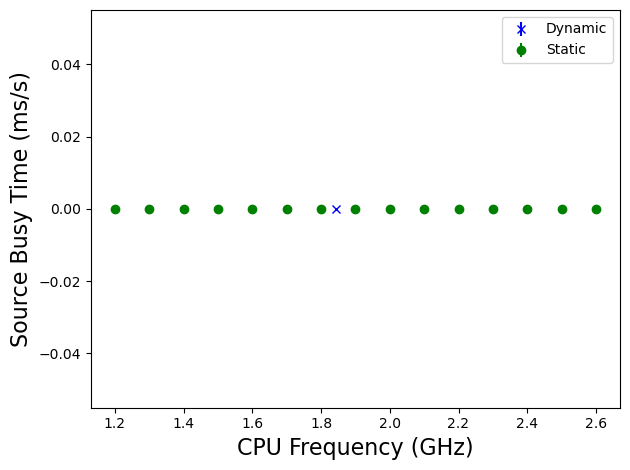

In [188]:
doPlot1('dvfs', 'SourcebusyTimeMsPerSecond_avg', 
        "CPU Frequency (GHz)", "Source Busy Time (ms/s)")


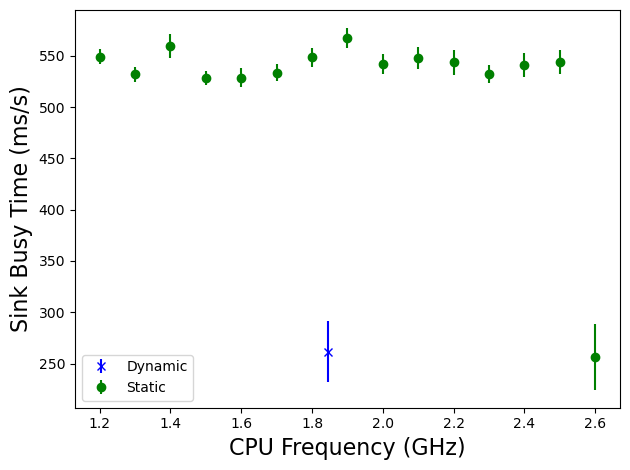

In [184]:
doPlot1('dvfs', 'SinkbusyTimeMsPerSecond_avg', 
        "CPU Frequency (GHz)", "Sink Busy Time (ms/s)")

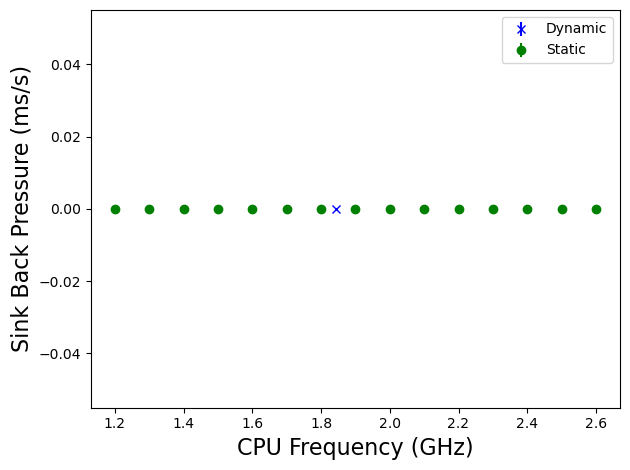

In [185]:
doPlot1('dvfs', 'SinkbackPressuredTimeMsPerSecond_avg', 
        "CPU Frequency (GHz)", "Sink Back Pressure (ms/s)")

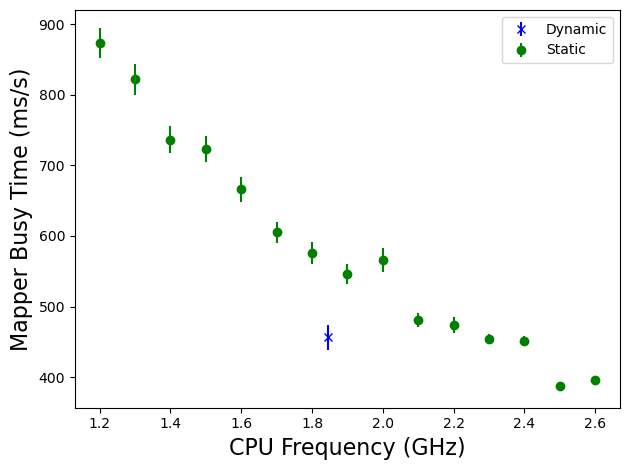

In [186]:
doPlot1('dvfs', 'MapperbusyTimeMsPerSecond_avg', 
        "CPU Frequency (GHz)", "Mapper Busy Time (ms/s)")

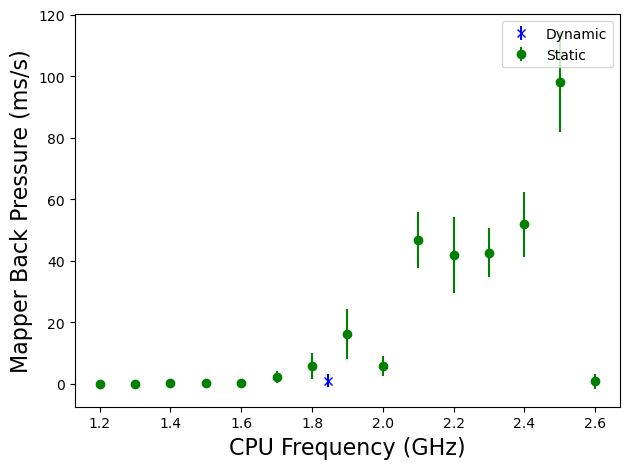

In [187]:
doPlot1('dvfs', 'MapperbackPressuredTimeMsPerSecond_avg', 
        "CPU Frequency (GHz)", "Mapper Back Pressure (ms/s)")

